### Import Packs

In [830]:
from keras.utils import to_categorical
from keras import layers
from keras import models
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image
from matplotlib import image
from matplotlib import pyplot
import pandas as pd
from keras.utils import to_categorical

### Generate Images From Directory

In [831]:
df = pd.read_csv('Test.csv') # Test Df

train_data_dir = '../Mod 6 Project/Data/Train'
test_data_dir = '../Mod 6 Project/Data/Test'

In [788]:
train_batches = ImageDataGenerator(rescale=1./255).flow_from_directory(
                    train_data_dir,
                    target_size=(64,64),
                    classes=[str(i) for i in np.arange(43)],
                    batch_size=39209)

test_batches = ImageDataGenerator(rescale=1./255).flow_from_directory(
                    test_data_dir,
                    target_size=(64,64),
                    classes=[],
                    batch_size=12630)

Found 39209 images belonging to 43 classes.
Found 12630 images belonging to 1 classes.


In [789]:
train_data, train_labels = next(train_batches)
test_data, test_labels = next(test_batches)

In [815]:
print('test data: {}'.format(test_data.shape))
print('test label: {}'.format(test_labels.shape))
print('train data: {}'.format(train_data.shape))
print('train label: {}'.format(train_labels.shape))

test data: (12630, 64, 64, 3)
test label: (12630, 43)
train data: (39209, 64, 64, 3)
train label: (39209, 43)


## Reshaping Train and Test Labels from 1 Column to 43 Columns

In [792]:
# train labels
train_labels = np.array([list(img).index(1.0) for img in train_labels])

array([38, 23,  6, ...,  9, 18,  7])

In [793]:
# test labels
path_test = [int(i.replace('Test/','').replace('.png','')) for i in list(df['Path'])]
id_test = list(df['ClassId'])
path_id = dict(zip(path_test, id_test))
labels = [path_id[batch] for batch in list(test_batches.index_array)]
test_labels = np.array(labels)

In [833]:
print('test label: {}'.format(test_labels.shape))
print('train label: {}'.format(train_labels.shape))

test label: (12630, 43)
train label: (39209, 43)


In [812]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

### C-Neural Network Architecture

In [834]:
from keras import layers
from keras import models
from keras import regularizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(layers.Dropout(0.5))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(43, activation='softmax'))


In [835]:
model.summary()

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_92 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 62, 62, 32)        0         
_________________________________________________________________
max_pooling2d_75 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_93 (Conv2D)           (None, 29, 29, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 29, 29, 64)        0         
_________________________________________________________________
max_pooling2d_76 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_94 (Conv2D)           (None, 12, 12, 64)      

In [836]:
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [837]:
history = model.fit(train_data,
                    train_labels,  
                    epochs=8, 
                    batch_size=750)

Epoch 1/8
39209/39209 [==============================] - 131s 3ms/step - loss: 2.1887 - accuracy: 0.4432
Epoch 2/8
39209/39209 [==============================] - 134s 3ms/step - loss: 0.5830 - accuracy: 0.8342
Epoch 3/8
39209/39209 [==============================] - 135s 3ms/step - loss: 0.2798 - accuracy: 0.9217
Epoch 4/8
39209/39209 [==============================] - 134s 3ms/step - loss: 0.1805 - accuracy: 0.9496
Epoch 5/8
39209/39209 [==============================] - 135s 3ms/step - loss: 0.1286 - accuracy: 0.9639
Epoch 6/8
39209/39209 [==============================] - 134s 3ms/step - loss: 0.1004 - accuracy: 0.9723
Epoch 7/8
39209/39209 [==============================] - 134s 3ms/step - loss: 0.0825 - accuracy: 0.9764
Epoch 8/8
39209/39209 [==============================] - 134s 3ms/step - loss: 0.0662 - accuracy: 0.9813


In [838]:
test_loss, test_acc = model.evaluate(test_data, test_labels)
test_acc

12630/12630 [==============================] - 11s 843us/step


0.9224861264228821

In [839]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

predictions_transfer = model.predict(test_data)
predictions_transfer = np.around(predictions_transfer)
f1_score(test_labels, predictions_transfer, average='micro')

0.8939897311990336

ValueError: x and y must have same first dimension, but have shapes (5,) and (8,)

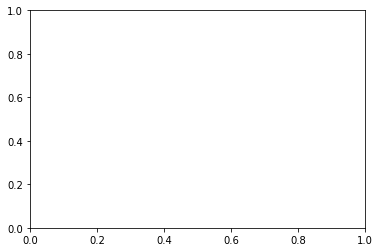

In [840]:
epochs = range(1, 6)
loss = history.history['loss']
acc = history.history['accuracy']
import matplotlib.pyplot as plt

# b+ is for "blue cross"
plt.plot(epochs, loss, '--', label='Loss')
plt.plot(epochs, acc, '-', label='Accuracy')

# "bo" is for "blue dot"
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# 10 epochs, 256 batch size w/o regularuzer